In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#Declare a Base using 'automap_base()'
Base = automap_base()

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
#This will show you how many tables there are and then how many maps there will be
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database.

# Precipitation Analysis

In [11]:
#Create the inspector and connect to engine
inspector = inspect(engine)

In [12]:
#Review names of the tables
inspector.get_table_names()

['measurement', 'station']

In [13]:
#Review column names of 'measurement' table using inspector
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#Review column names of 'station' table using inspector
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
#Determine total dates present
session.query(func.count(Measurement.date)).all()

[(19550)]

In [22]:
#Determine latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
month_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23').all()

In [54]:
#load the query into a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(month_prcp).set_index('date')

#Drop any NAN values
df_clean = df.dropna()

#Sort DataFrame values by date
df_sort = df_clean.sort_values(['date'])

<font color='red'>How do you add y axis label?</font>

<AxesSubplot:xlabel='date'>

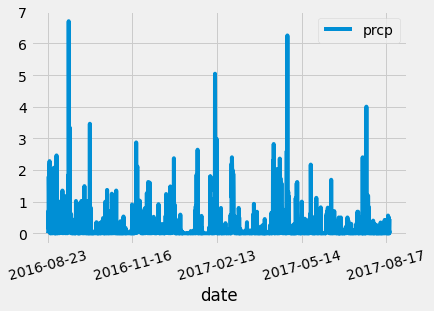

In [57]:
# Plot the results using the DataFrame plot method.
df_sort.plot(rot=15)

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
rename = df_sort.rename(columns={'prcp':'precipitation'})
sum_stats = rename.describe()
sum_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [93]:
#Display station information from Station
dict_format = session.query(Station).first()
dict_format.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20552a4e760>,
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US'}

In [100]:
#Display station information from Measurement
dict_format2 = session.query(Measurement).first()
dict_format2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20552b89970>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [99]:
# Design a query to show how many stations are available in this dataset.
stations = session.query(Station.station).count()
print(f'Total number of stations is: {stations}')

Total number of stations is: 9


In [79]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = session.query(Station)
for stat in active_stations:
    print(stat.name)

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [106]:
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(Measurement.station.desc()).all()

active_station
#Descending isn't working?

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
